In [281]:
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt
import re
import bisect 
import pprint as pp

In [282]:
filepath = 'data/day7.txt'

In [283]:
STEP_PATTERN = re.compile(r'Step (.) must be finished before step (.) can begin.')

In [284]:
def get_steps(filepath, pattern=STEP_PATTERN):
    with open(filepath) as file:
        for line in file.readlines():
            match = pattern.findall(line)[0]
            yield match

In [285]:
steps = list(get_steps(filepath))

In [286]:
# Format: G -> L
print(steps[0])

('G', 'L')


In [287]:
nodes = set([i for i,_ in steps]+[i for _,i in steps])
sources = set((i for i,_ in steps))
destinations = set((i for _,i in steps))
pure_sources = list(set((i for i in sources if i not in destinations)))
pure_destinations = list(set((i for i in destinations if i not in sources)))

In [288]:
dependency_matrix = {}
for start, end in steps:
    if end not in dependency_matrix:
        dependency_matrix[end] = []
    dependency_matrix[end].append(start)
print(dependency_matrix)

{'L': ['G'], 'A': ['R', 'F', 'H', 'D', 'O', 'Z'], 'U': ['X', 'K', 'V'], 'F': ['H', 'O', 'U', 'C'], 'T': ['F', 'C', 'D', 'P'], 'Q': ['D', 'C', 'J', 'P', 'T', 'S', 'F', 'A', 'B'], 'S': ['M', 'U', 'G', 'T', 'I', 'P', 'O', 'F', 'D'], 'K': ['Z'], 'P': ['L', 'E', 'Z', 'R'], 'I': ['H', 'R', 'L', 'C', 'P'], 'E': ['Z', 'C'], 'O': ['K'], 'X': ['G'], 'B': ['V', 'S', 'F', 'G', 'W', 'M', 'K', 'P', 'R', 'X', 'A', 'J'], 'H': ['W', 'U', 'R'], 'R': ['J', 'L', 'U'], 'N': ['Z', 'O', 'A', 'B', 'Q', 'S', 'P', 'I', 'T'], 'C': ['G', 'U'], 'V': ['M'], 'Y': ['I', 'Q', 'N', 'A', 'B', 'U', 'H', 'T', 'D', 'P', 'C'], 'J': ['O', 'D', 'E', 'L', 'Z', 'W'], 'D': ['Z', 'M', 'X', 'G']}


In [289]:
next_matrix = {}
for start, end in steps:
    if start not in next_matrix:
        next_matrix[start] = []
    next_matrix[start].append(end)
print(next_matrix)

{'W': ['H', 'B', 'J'], 'J': ['Q', 'R', 'B'], 'Z': ['N', 'K', 'D', 'P', 'E', 'J', 'A'], 'F': ['T', 'A', 'Q', 'B', 'S'], 'I': ['Y', 'S', 'N'], 'Q': ['Y', 'N'], 'A': ['N', 'Y', 'Q', 'B'], 'U': ['S', 'Y', 'C', 'H', 'F', 'R'], 'K': ['U', 'O', 'B'], 'P': ['Q', 'N', 'B', 'S', 'Y', 'I', 'T'], 'T': ['Q', 'S', 'N', 'Y'], 'E': ['P', 'J'], 'O': ['N', 'J', 'F', 'A', 'S'], 'X': ['U', 'B', 'D'], 'B': ['N', 'Y', 'Q'], 'G': ['L', 'S', 'B', 'C', 'X', 'D'], 'H': ['F', 'A', 'I', 'Y'], 'R': ['A', 'P', 'I', 'B', 'H'], 'N': ['Y'], 'C': ['Q', 'T', 'F', 'I', 'E', 'Y'], 'V': ['B', 'U'], 'M': ['S', 'V', 'B', 'D'], 'L': ['P', 'J', 'R', 'I'], 'D': ['Q', 'J', 'A', 'Y', 'S', 'T'], 'S': ['B', 'Q', 'N']}


In [290]:
print('Starting points: {}'.format(pure_sources))
print('Ending points: {}'.format(pure_destinations))

Starting points: ['W', 'Z', 'G', 'M']
Ending points: ['Y']


In [291]:
def get_path_backwards():
    path = []
    visited = []
    def explore_path(node):
        if node in visited:
            return
        visited.append(node)
        # pure source
        if node not in dependency_matrix:
            path.append(node)
        else:
            dependencies = dependency_matrix[node]
            for dep in sorted(dependencies):
                if dep not in path:
                    explore_path(dep)
            # after visiting all dependencies
            path.append(node)
    for dest in pure_destinations:
        explore_path(dest)
    return path

In [292]:
def get_path_forwards():
    path = []
    queue = sorted(pure_sources) # only have satisfied sources
    while len(queue) > 0:
        node = queue.pop(0)
        path.append(node)
        nexts = next_matrix[node] if node in next_matrix else []
        # check the next nodes and see if can explore
        for next in sorted(nexts):
            # already explored ignore
            if next in path:
                continue
            deps = dependency_matrix[next] if next in dependency_matrix else []
            can_visit = True
            # if deps satisfied, push to queue
            for dep in deps:
                if dep not in path:
                    can_visit = False
                    break
            if can_visit:
                bisect.insort(queue, next)
    return path

In [293]:
path = get_path_forwards()
for index, char in enumerate(path):
    deps = dependency_matrix[char] if char in dependency_matrix else []
    if index == 0 and deps:
        raise ValueError('Error: {} needs {}'.format(char, deps))
    elif index > 0:
        visited = path[:index+1]
        for dep in deps:
            if dep not in visited:
                raise ValueError('Error: {} needs {}'.format(char, dep))

In [294]:
print(''.join(path))

GLMVWXZDKOUCEJRHFAPITSBQNY


In [295]:
G = nx.DiGraph()
G.add_edges_from(list(sorted(steps)))
G.add_nodes_from(nodes)

<IPython.core.display.Javascript object>


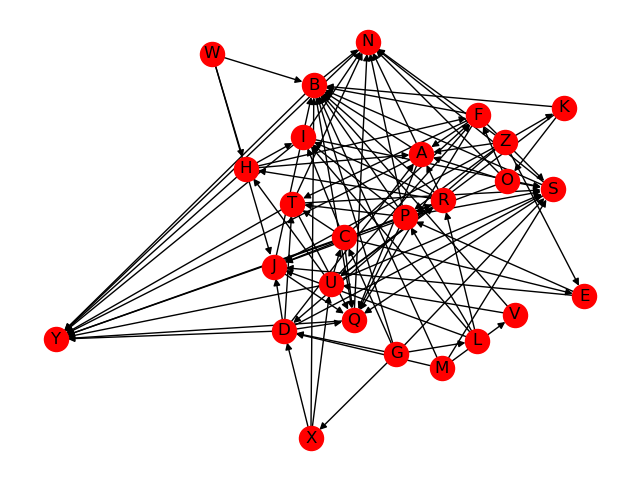

In [296]:
nx.draw(G, with_labels=True)

# Part 2

In [297]:
countdowns = {c:ord(c.lower())-ord('a')+1 for c in nodes}
print(countdowns)

{'L': 12, 'F': 6, 'W': 23, 'A': 1, 'Z': 26, 'U': 21, 'I': 9, 'Q': 17, 'S': 19, 'K': 11, 'P': 16, 'T': 20, 'H': 8, 'X': 24, 'O': 15, 'B': 2, 'G': 7, 'E': 5, 'R': 18, 'N': 14, 'C': 3, 'V': 22, 'M': 13, 'Y': 25, 'J': 10, 'D': 4}


In [298]:
TOTAL_WORKERS = 5

In [301]:
def get_timetable(total_workers):
    workers = [None]*total_workers
    # countdowns for each job
    countdowns = {c:ord(c.lower())-ord('a')+1+60 for c in nodes} 
    done = []
    queue = sorted(pure_sources) # has ready to do jobs
    timetable = []
    while True:
        # check if workers are doing stuff or there is stuff to do
        for worker in workers:
            if worker:
                break
        else:
            if len(queue) <= 0:
                break
        # go through each worker
        for index, worker in enumerate(workers):
            # if worker finished
            if worker and countdowns[worker] <= 0:
                done.append(worker)
                workers[index] = None
                # when work is finished, add next work to the list
                nexts = next_matrix[worker] if worker in next_matrix else []
                # check the next nodes and see if can explore
                for next in sorted(nexts):
                    # already explored or in queue already ignore
                    if next in done or next in queue:
                        continue
                    deps = dependency_matrix[next] if next in dependency_matrix else []
                    can_visit = True
                    # if deps satisfied, push to queue
                    for dep in deps:
                        if dep not in done:
                            can_visit = False
                            break
                    if can_visit:
                        bisect.insort(queue, next)
        # if no worker try find job
        for index, worker in enumerate(workers):
            worker = workers[index]
            if not workers[index]:
                workers[index] = queue.pop(0) if len(queue) > 0 else None
                worker = workers[index]
        # perform countdowns
        for index, worker in enumerate(workers):
            # perform work if available
            if worker:
                countdowns[worker] -= 1
        # push to timetable
        entry = [worker if worker else '.' for worker in workers]
        timetable.append(entry)
    # finished
    return (timetable, done)

In [302]:
timetable, done = get_timetable(TOTAL_WORKERS)
pp.pprint(timetable)
pp.pprint(done)
print('Total time: {} seconds'.format(len(timetable)-1))

[['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z', '.'],
 ['G', 'M', 'W', 'Z'